<br>

<font size='10' style="color:forestgreen"><b> Customer Transaction Prediction </b> </font>

<br>

<font size='6' style="color: forestgreen"><b> Content </b> </font>
<a name="content"></a>
<br>


1. [Objetivo](#Objetivo) 
<br>
<br>

2. [Imports](#Imports)
<br>
<br>

3. [Dataset](#Dataset) 
<br>
<br>

4. [Uso de memoria](#Memory)
<br>
<br>

5. [Análisis de target](#Target)
<br>
<br>

6. [Análisis de las variables anónimas](#Anonimas)

    6.1 [Distribuciones y outliers](#Outliers)
    
    6.2 [Análisis intercuartil](#Intercuartil)
    
    6.3 [Análisis multivariado](#Multivariado)
    <br>
    <br>
    
7. [Conclusión](#Conclusion)
<br>
<br>

8. [Pasos a seguir](#Pasos)
    
    




<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:forestgreen"><b> Objetivo </b> </font>

<a name="Objetivo"></a>

[[ Back to Top ]](#content)

Los datos con los que trabajaremos provienen de un dataset del banco Santander y fueron tomados de kaggle: https://www.kaggle.com/datasets/lakshmi25npathi/santander-customer-transaction-prediction-dataset


El banco Santander busca entender mejor a sus clientes, de forma tal que pueda ofrecerles los productos que les permitan alcanzar sus metas financieras. Es por ello que con este dataset se busca predecir **cuáles son los clientes que van a realizar una determinada transacción** en el futuro, independientemente del monto de dicha transacción. 

El dataset ya fue procesado con anterioridad y cargado a kaggle de esta manera, es por ello que las variables son anónimas. La variable target adopta los valores 0 y 1, que implica que el cliente no ha realizado o sí ha realizado una determinada transacción, respectivamente. 
Cabe destacar que, aunque no tengamos interpretabilidad de las variables, de igual modo se podrá confeccionar un algoritmo que permita predecir la variable target. 


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:forestgreen"><b> Imports </b> </font>

<a name="Imports"></a>

[[ Back to Top ]](#content)

In [2]:
#librerías para manipulación de datos
import pandas as pd
import numpy as np


#librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<br>
<br>
<br>
<br>
<br>
<br>
<br>


<font size='6' style="color:forestgreen"><b> Dataset </b> </font>

<a name="Dataset"></a>

[[ Back to Top ]](#content)

In [3]:
# Abrimos el archivo descargado de kaggle

df = pd.read_csv('train.csv', index_col="ID_code")
df.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
ID_code                                                                      
train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

           var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  \
ID_code                   ...                                                
train_0  18.6266 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227   
train_1  16.5338  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   
train_2  14.6155 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   
train_3  14.9250 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347   
train_4  19.2514  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876   

         var_195  var_196  var_197  var_198  var_199  
ID_code                                               
train_0  -2.3978   7.8784   8.5635  12.7803  -1.0914  
train_1   2.0339   8.1267   8.7889  18.3560   1.9518  
train_2   3.1417  -6.5213   8.2675  14.7222   0.3965  
train_3  -1.2706  -2.9275  10.2922  17.9697  -8.9996  
train_4  -1.5121   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

In [9]:
# Vemos la cantidad de registros y de columnas que contiene el dataset

df.shape

(200000, 201)

In [10]:
# Información del dataset. Vemos que todas las variables son numéricas

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, train_0 to train_199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 308.2+ MB


In [11]:
# Revisamos de manera general la forma en la que se comportan todas las variables del dataset

df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [12]:
# Buscamos el nombre de las columnas en orden alfabético. Todas las variables son anónimas.

column_names = list(df.columns)
sorted(column_names)

['target',
 'var_0',
 'var_1',
 'var_10',
 'var_100',
 'var_101',
 'var_102',
 'var_103',
 'var_104',
 'var_105',
 'var_106',
 'var_107',
 'var_108',
 'var_109',
 'var_11',
 'var_110',
 'var_111',
 'var_112',
 'var_113',
 'var_114',
 'var_115',
 'var_116',
 'var_117',
 'var_118',
 'var_119',
 'var_12',
 'var_120',
 'var_121',
 'var_122',
 'var_123',
 'var_124',
 'var_125',
 'var_126',
 'var_127',
 'var_128',
 'var_129',
 'var_13',
 'var_130',
 'var_131',
 'var_132',
 'var_133',
 'var_134',
 'var_135',
 'var_136',
 'var_137',
 'var_138',
 'var_139',
 'var_14',
 'var_140',
 'var_141',
 'var_142',
 'var_143',
 'var_144',
 'var_145',
 'var_146',
 'var_147',
 'var_148',
 'var_149',
 'var_15',
 'var_150',
 'var_151',
 'var_152',
 'var_153',
 'var_154',
 'var_155',
 'var_156',
 'var_157',
 'var_158',
 'var_159',
 'var_16',
 'var_160',
 'var_161',
 'var_162',
 'var_163',
 'var_164',
 'var_165',
 'var_166',
 'var_167',
 'var_168',
 'var_169',
 'var_17',
 'var_170',
 'var_171',
 'var_172',
 'var

In [13]:
# Revisamos los tipos de datos de las variables y vemos que todas las variables anónimas son de tipo float64.

data_types= df.dtypes
data_types.to_dict()

{'target': dtype('int64'),
 'var_0': dtype('float64'),
 'var_1': dtype('float64'),
 'var_2': dtype('float64'),
 'var_3': dtype('float64'),
 'var_4': dtype('float64'),
 'var_5': dtype('float64'),
 'var_6': dtype('float64'),
 'var_7': dtype('float64'),
 'var_8': dtype('float64'),
 'var_9': dtype('float64'),
 'var_10': dtype('float64'),
 'var_11': dtype('float64'),
 'var_12': dtype('float64'),
 'var_13': dtype('float64'),
 'var_14': dtype('float64'),
 'var_15': dtype('float64'),
 'var_16': dtype('float64'),
 'var_17': dtype('float64'),
 'var_18': dtype('float64'),
 'var_19': dtype('float64'),
 'var_20': dtype('float64'),
 'var_21': dtype('float64'),
 'var_22': dtype('float64'),
 'var_23': dtype('float64'),
 'var_24': dtype('float64'),
 'var_25': dtype('float64'),
 'var_26': dtype('float64'),
 'var_27': dtype('float64'),
 'var_28': dtype('float64'),
 'var_29': dtype('float64'),
 'var_30': dtype('float64'),
 'var_31': dtype('float64'),
 'var_32': dtype('float64'),
 'var_33': dtype('float64'

In [14]:
# Revisamos si hay duplicados

df.duplicated().sum()

0

In [15]:
# Revisamos si existen valores nulos

df.isna().any().value_counts()

False    201
dtype: int64

<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:forestgreen"><b> Uso de memoria </b> </font>

<a name="Memory"></a>

[[ Back to Top ]](#content)

En vista de que todas las variables son de tipo float64, revisaremos si es necesario utilizar ese formato o si se puede reducir el uso de memoria para el set de datos

In [4]:
# Buscamos el uso de memoria actual

# Todos usan 1600000
df.memory_usage().value_counts()

1600000    202
dtype: int64

In [5]:
#Función creada para optimizar los floats

def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    """
    Esta función optimiza todas las columnas con tipo de datos FLOAT.
    """
    
    cols_float = df.select_dtypes(include=["float64"]).columns.tolist() 
    df[cols_float] = df[cols_float].apply(pd.to_numeric, downcast='float') 
       
    
    return df

In [6]:
df = optimize_floats(df)
df.dtypes

#Podemos ver que se ha optimizado el uso de memoria para las variables anónimas del set de datos

target       int64
var_0      float32
var_1      float32
var_2      float32
var_3      float32
            ...   
var_195    float32
var_196    float32
var_197    float32
var_198    float32
var_199    float32
Length: 201, dtype: object

In [6]:
# Logramos reducir la memoria y que la mayoría utilice la mitad del espacio que antes.

df.memory_usage().value_counts()

800000     200
1600000      2
dtype: int64

In [7]:
#guardaremos el set de datos tras optimizar su uso de memoria para facilitar futuros trabjos. 

df.to_pickle("../trainDownCast.pkl")

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<br>

<font size='6' style="color:forestgreen"><b> Análisis de target </b> </font>

<a name="Target"></a>

[[ Back to Top ]](#content)

In [20]:
# Contamos los distintos valores que puede tener la variable target (que indica si el usuario realizará o no una determinada operación)

t = df['target']
t.value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [21]:
# Vemos si existen valores nulos en la variable target
t.isna().sum()

0

In [22]:
# Calculamos el porcentaje que representa cada uno de los registros de la variable target

counts = t.value_counts()
percent100 = t.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Cantidad': counts, 'Porcentaje': percent100})

#---------------------------------------------------------
# Resulta relevante mencionar que el 90% de los registros corresponde a personas que no realizaron la operación, 
# mientras que el 10% restante corresponde a personas que sí la han realizado. 


Cantidad Porcentaje
0    179902      90.0%
1     20098      10.0%

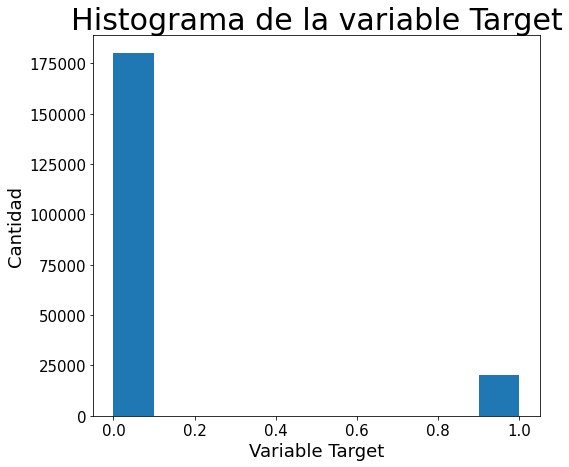

In [23]:
# Creamos un histograma para la variable target

plt.figure(figsize=(8,7))
plt.hist(t)
plt.xlabel('Variable Target', fontsize=18)
plt.ylabel('Cantidad', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Histograma de la variable Target", fontsize=30)
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:forestgreen"><b> Análisis de las variables anónimas </b> </font>

<a name="Anonimas"></a>

[[ Back to Top ]](#content)

In [24]:
# Revisamos el tipo de datos que tiene cada columna 
list(df.dtypes)

#========================================================================
# Todos son float32 tras el trabajo que realizamos salvo la variable target que es integer

[dtype('int64'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float32'),
 dtype('float3

In [25]:
# Revisamos si hay valores nulos en todo el dataset

df.isnull().any().value_counts()

#========================================================================
# No hay valores nulos en todo el dataset

False    201
dtype: int64

In [8]:
# Decidimos estudiar si existe correlación entre las variables 

correlation_table= df.corr()
correlation_table

target     var_0     var_1     var_2     var_3     var_4     var_5  \
target   1.000000  0.052390  0.050343  0.055870  0.011055  0.010915  0.030979   
var_0    0.052390  1.000000 -0.000544  0.006573  0.003801  0.001326  0.003046   
var_1    0.050343 -0.000544  1.000000  0.003980  0.000010  0.000303 -0.000902   
var_2    0.055870  0.006573  0.003980  1.000000  0.001001  0.000723  0.001569   
var_3    0.011055  0.003801  0.000010  0.001001  1.000000 -0.000322  0.003253   
...           ...       ...       ...       ...       ...       ...       ...   
var_195  0.028285  0.002073 -0.000785 -0.001070  0.001206  0.003706 -0.001274   
var_196  0.023608  0.004386 -0.000377  0.003952 -0.002800  0.000513  0.002880   
var_197 -0.035303 -0.000753 -0.004157  0.001078  0.001164 -0.000046 -0.000535   
var_198 -0.053000 -0.005776 -0.004861 -0.000877 -0.001651 -0.001821 -0.000953   
var_199  0.025434  0.003850  0.002287  0.003855  0.000506 -0.000786  0.002767   

            var_6     var_7     var_8  ...   var_190   var_191   var_192  \
target   0.066731 -0.003025  0.019584  ...  0.055973  0.047114 -0.042858   
var_0    0.006983  0.002429  0.004962  ...  0.002752  0.000206 -0.005373   
var_1    0.003258  0.001511  0.004098  ...  0.006627  0.003621 -0.002604   
var_2    0.000883 -0.000991  0.002648  ...  0.000197  0.001285 -0.003400   
var_3   -0.000774  0.002500  0.003553  ...  0.000151  0.002445 -0.001530   
...           ...       ...       ...  ...       ...       ...       ...   
var_195  0.001244  0.001854  0.001396  ...  0.004571  0.000870 -0.004745   
var_196  0.005378  0.001045 -0.003242  ... -0.000847  0.002466 -0.001386   
var_197 -0.003565  0.003466 -0.004583  ... -0.004974  0.000906 -0.000527   
var_198 -0.003025  0.000650  0.002950  ... -0.000153 -0.000067  0.003451   
var_199  0.006096 -0.001457  0.000854  ... -0.000404  0.003595 -0.001239   

          var_193   var_194   var_195   var_196   var_197   var_198   var_199  
target  -0.017709 -0.022838  0.028285  0.023608 -0.035303 -0.053000  0.025434  
var_0    0.001616 -0.001514  0.002073  0.004386 -0.000753 -0.005776  0.003850  
var_1    0.001153 -0.002557 -0.000785 -0.000377 -0.004157 -0.004861  0.002287  
var_2    0.000549  0.002104 -0.001070  0.003952  0.001078 -0.000877  0.003855  
var_3   -0.001699 -0.001054  0.001206 -0.002800  0.001164 -0.001651  0.000506  
...           ...       ...       ...       ...       ...       ...       ...  
var_195 -0.003143 -0.001201  1.000000  0.002517 -0.004170 -0.000536  0.002042  
var_196 -0.005308 -0.005040  0.002517  1.000000 -0.000454  0.000253  0.000607  
var_197  0.005068  0.000884 -0.004170 -0.000454  1.000000  0.001183  0.004991  
var_198  0.001646  0.003194 -0.000536  0.000253  0.001183  1.000000 -0.004731  
var_199 -0.000552 -0.005615  0.002042  0.000607  0.004991 -0.004731  1.000000  

[201 rows x 201 columns]

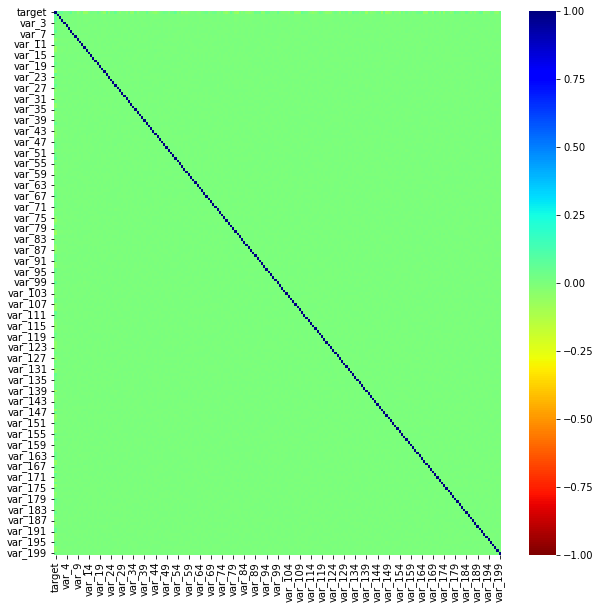

In [11]:
# Utilizamos un gráfico heatmap para visualizar la correlación entre variables

plt.figure(figsize=(10,10))
sns.heatmap(correlation_table, vmin = -1, vmax = 1, cmap ='jet_r')
plt.show()

#=====================================================================================================
# No hay correlación entre las variables ya que todos los datos se encuentran cercanos a 0
# Entendemos que esto se debe a que el dataset fue procesado anteriormente.

In [13]:
# Creamos una variable para analizar de forma ordenada la correlación de todas las variables con target. 

correlac_con_target = correlation_table["target"].apply(lambda corr: abs(corr)).sort_values()
correlac_con_target

#=====================================================================================
# Vemos que todas las variables tienen una correlación mínima con la variable target
# La variable var_81 es la de mayor correlación.

var_185    0.000053
var_27     0.000582
var_30     0.000638
var_17     0.000864
var_38     0.000970
             ...   
var_6      0.066731
var_12     0.069489
var_139    0.074080
var_81     0.080917
target     1.000000
Name: target, Length: 201, dtype: float64

In [14]:
# TOP10 variables con la mayor correlación con la variable target

mayor_corr = correlac_con_target.nlargest(10)
mayor_corr = mayor_corr.to_dict()
mayor_corr

{'target': 1.0,
 'var_81': 0.08091733225144167,
 'var_139': 0.07407963271455917,
 'var_12': 0.0694892766326826,
 'var_6': 0.06673084520462776,
 'var_110': 0.0642752989888015,
 'var_146': 0.06364388371677732,
 'var_53': 0.06339860914035844,
 'var_26': 0.06242219280095159,
 'var_76': 0.06191746588291698}

In [15]:
# 10 variables con la menor correlación con la variable target

menor_corr= correlac_con_target.nsmallest(10)
menor_corr = menor_corr.to_dict()
menor_corr

{'var_185': 5.311585752689365e-05,
 'var_27': 0.0005818917349485505,
 'var_30': 0.0006379418266000017,
 'var_17': 0.0008637245545774968,
 'var_38': 0.0009697567939633704,
 'var_41': 0.0012975964837112306,
 'var_126': 0.001392929425952153,
 'var_103': 0.0013953514829378709,
 'var_10': 0.0022132548854344,
 'var_100': 0.0022153272208436203}

Entre las variables de mayor correlación con target y las de menor correlación existe un orden de diferencia.
<br>
<br>

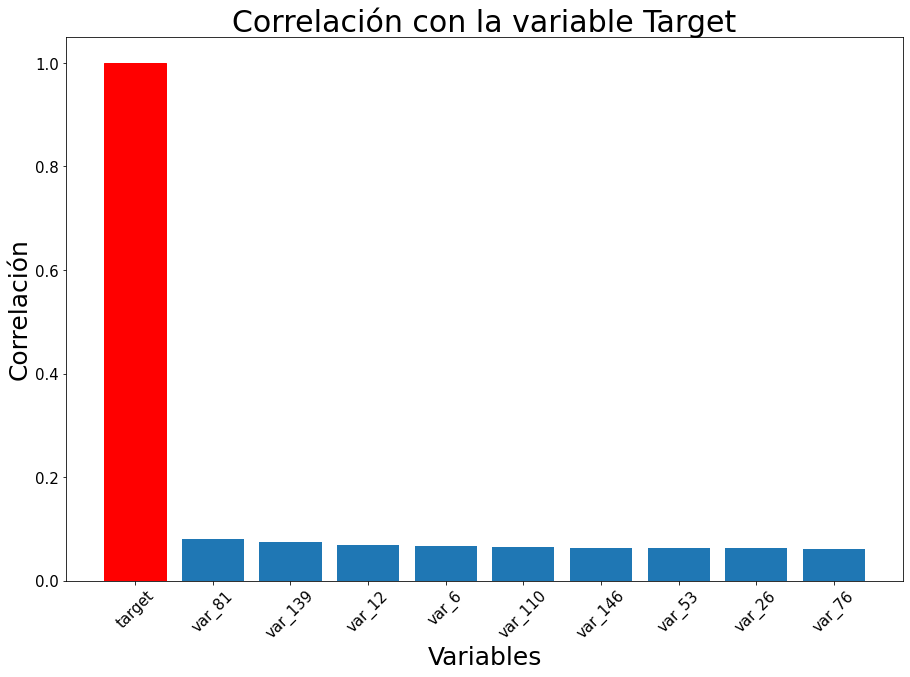

In [17]:
# A través de un gráfico comparamos de manera visual las variables con mayor correlación con la variable Target

plt.figure(figsize=(15,10))
barlist = plt.bar(mayor_corr.keys(), mayor_corr.values())
barlist[0].set_color('r')

plt.xticks(rotation=45, fontsize=15) #Rotamos el nombre del eje x
plt.yticks(fontsize=15)
plt.xlabel("Variables", fontsize=25)
plt.ylabel("Correlación", fontsize=25)
plt.title("Correlación con la variable Target", fontsize=30)
plt.show()

<br>

<font size='4' style="color:forestgreen"><b> Distribuciones y outliers </b> </font>

<a name="Outliers"></a>

Como mencionamos anteriormente, no conocemos el nombre de las variables y la correlación entre variables no existe. A pesar de eso, hemos decidido estudiar el comportamiento de las variables para determinar su distribución de manera visual.

En la siguiente sección analizaremos la simetría o asimetría de los datos de las variables anónimas y la existencia de outliers. 


Para estudiar la simetría de las variables revisaremos el skewness de las mismas. 
Buscamos el valor absoluto del skew de forma tal que luego podamos ver los que tienen módulo mayor a 1 (lo que indicaría que la variable es asimétrica). 


In [5]:
skew=df.skew().abs().sort_values()
skew

#===================================================================
#No hay variables (que no sean la target) con módulo de skew mayor a 1, por lo que no hay variables asimétricas.

var_194    0.000096
var_72     0.000853
var_21     0.001675
var_45     0.001727
var_5      0.002038
             ...   
var_179    0.242891
var_2      0.260314
var_168    0.267414
var_44     0.340172
target     2.657642
Length: 201, dtype: float64

In [35]:
# Variables con mayor skew
skew.nlargest(10)

target     2.657642
var_44     0.340172
var_168    0.267414
var_2      0.260314
var_179    0.242891
var_93     0.238090
var_0      0.235639
var_163    0.234780
var_81     0.232526
var_80     0.220236
dtype: float64

In [36]:
# Variables con menor skew
skew.nsmallest(10)

var_194    0.000096
var_72     0.000853
var_21     0.001675
var_45     0.001727
var_5      0.002038
var_32     0.003091
var_136    0.003517
var_3      0.003548
var_182    0.003947
var_88     0.004620
dtype: float64

In [40]:
# Variable más asimétrica (con el mayor skew)

df["var_44"].describe()

count    200000.000000
mean          8.948316
std           5.902959
min          -9.939600
25%           5.313650
50%           9.437200
75%          13.087300
max          34.196098
Name: var_44, dtype: float64

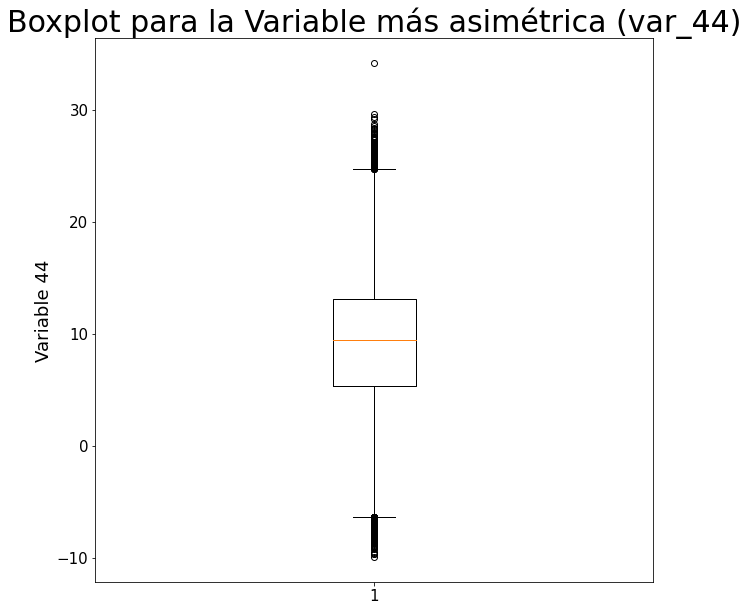

In [8]:
# Variable más asimétrica 

plt.figure(figsize=(10,10))
plt.boxplot(df["var_44"])
plt.ylabel('Variable 44', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Boxplot para la Variable más asimétrica (var_44)", fontsize=30)
plt.show()


Se puede observar que la mediana se encuentra ligeramente por encima del centro de la caja, lo que nos hace pensar que  la variable tiene una ligera cola hacia la derecha.  
Empleando el método desctribe se puede ver que la media es de 8.95 y la mediana de 9.44
Esta variable presenta outliers.

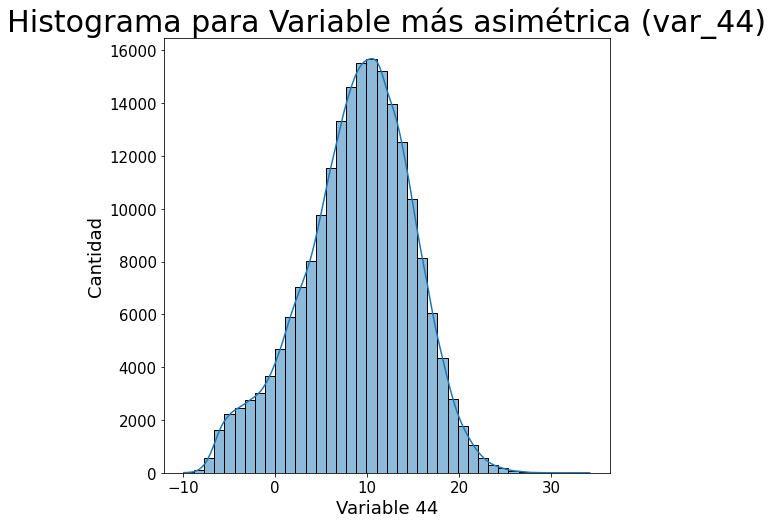

In [9]:
# Utilizamos seaborn que incluye la curva Kenell Density Estimate

plt.figure(figsize=(8,8))
sns.histplot(df["var_44"], bins=40, kde=True) 
plt.xlabel('Variable 44', fontsize=18)
plt.ylabel('Cantidad', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Histograma para Variable más asimétrica (var_44)", fontsize=30)
plt.show()

Con este gráfico comprobabmos que la variable tiene una pequeña cola hacia la derecha aunque su asimetría no es significativa.
En vista de que esta es la variable más asimétrica del set de datos, podemos concluir que todas las variables son bastante simétricas. 

<br>
<br>

<font size='4' style="color:forestgreen"><b> Análisis intercuartil </b> </font>

<a name="Intercuartil"></a>

Realizamos un análisis intercuartil para todas las variables, de forma tal que podamos detectar cuántos datos outliers tiene el dataset completo.

In [7]:
dft = df.drop(columns=["target"])
dft.head()

var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
ID_code                                                                       
train_0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
train_1  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
train_2   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
train_3  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
train_4   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

          var_8   var_9  ...  var_190  var_191  var_192  var_193    var_194  \
ID_code                  ...                                                  
train_0 -4.9200  5.7470  ...   4.4354   3.9642   3.1364   1.6910  18.522699   
train_1  3.1468  8.0851  ...   7.6421   7.7214   2.5837  10.9516  15.430500   
train_2 -4.9193  5.9525  ...   2.9057   9.7905   1.6704   1.6858  21.604200   
train_3 -5.8609  8.2450  ...   4.4666   4.7433   0.7178   1.4214  23.034700   
train_4  6.2654  7.6784  ...  -1.4905   9.5214  -0.1508   9.1942  13.287600   

         var_195  var_196  var_197    var_198  var_199  
ID_code                                                 
train_0  -2.3978   7.8784   8.5635  12.780300  -1.0914  
train_1   2.0339   8.1267   8.7889  18.356001   1.9518  
train_2   3.1417  -6.5213   8.2675  14.722200   0.3965  
train_3  -1.2706  -2.9275  10.2922  17.969700  -8.9996  
train_4  -1.5121   3.9267   9.5031  17.997400  -8.8104  

[5 rows x 200 columns]

In [8]:
#Creamos los cuantiles 25 y 75 empleando el método quantile. 

Q1=dft.quantile(0.25) #Cuartil 25
Q3=dft.quantile(0.75) #Cuartil 75


#Calculamos el rango InterCuartil, es decir, el largo de la caja en los boxplots
IQR=Q3-Q1

In [9]:
#Empleando valores estándar, realizamos el cálulo para los límites inferiores y superiores de los bigotes del boxplot. 

L_BOUND= Q1-1.5*IQR #límite inferiror
H_BOUND= Q3+1.5*IQR #límite superior

#De esta manera, todos los valores que estén por fuera de este rango serán Outliers

In [10]:
#Generamos lista para iterar y realizar el cálculo en todo el set de datos

columns=list(dft.columns)
lista=list(range(0,200)) 

In [11]:
#Cálculamos los outliers por variable, y obtenemos el indice
outliers=[] #lista vacia para gurdar valores
max_value=-1 #inicializo max_value
column=-1 #inicializo column
for i in lista: #Recoremos todas las columnas
    a=len(dft[(((df[columns[i]]) < L_BOUND[i])| ((dft[columns[i]]) > H_BOUND[i]))]) #Guardamos la cantidad de outliers
    outliers.append(a) #Agrego a una lista la cantidad de outliers
    if max_value<a: #Valido si el largo en ejecución es más largo que el historico
        max_value=a #Si es verdadoro guardo el valor
        column=i #Si es verdadero guardo el indice

In [14]:
#Cantidad de outliers de las 5 variables con más outliers

max5=outliers[0:5]
max5

[1509, 1208, 889, 804, 733]

In [15]:
#Las 5 variables con más outliers

max_0=outliers.index(1509)
max_1=outliers.index(1208)
max_2=outliers.index(889)
max_3=outliers.index(804)
max_4=outliers.index(733)

print(max_0,max_1,max_2,max_3,max_4)

0 1 2 3 4


In [12]:
#Ordenamos para ver los mayores valores

outliers.sort(reverse=True)
outliers

#============================================================
#la variable con la mayor cantidad de outliers tiene 1509 valores outlier

[1509,
 1208,
 889,
 804,
 733,
 637,
 589,
 572,
 502,
 498,
 470,
 465,
 461,
 446,
 432,
 413,
 401,
 397,
 397,
 383,
 353,
 331,
 325,
 323,
 313,
 309,
 289,
 286,
 279,
 275,
 268,
 263,
 254,
 254,
 251,
 241,
 239,
 233,
 231,
 228,
 222,
 221,
 198,
 193,
 190,
 188,
 187,
 186,
 178,
 177,
 177,
 176,
 172,
 169,
 163,
 162,
 158,
 154,
 152,
 152,
 150,
 148,
 146,
 145,
 144,
 132,
 131,
 131,
 129,
 128,
 125,
 122,
 113,
 109,
 107,
 104,
 104,
 96,
 96,
 95,
 94,
 92,
 90,
 88,
 85,
 84,
 80,
 80,
 76,
 70,
 68,
 66,
 58,
 56,
 53,
 51,
 49,
 49,
 48,
 47,
 43,
 43,
 42,
 41,
 41,
 40,
 39,
 39,
 38,
 38,
 37,
 36,
 35,
 34,
 34,
 32,
 30,
 30,
 28,
 27,
 27,
 27,
 24,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 22,
 20,
 19,
 17,
 17,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 13,
 12,
 11,
 11,
 10,
 9,
 8,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 

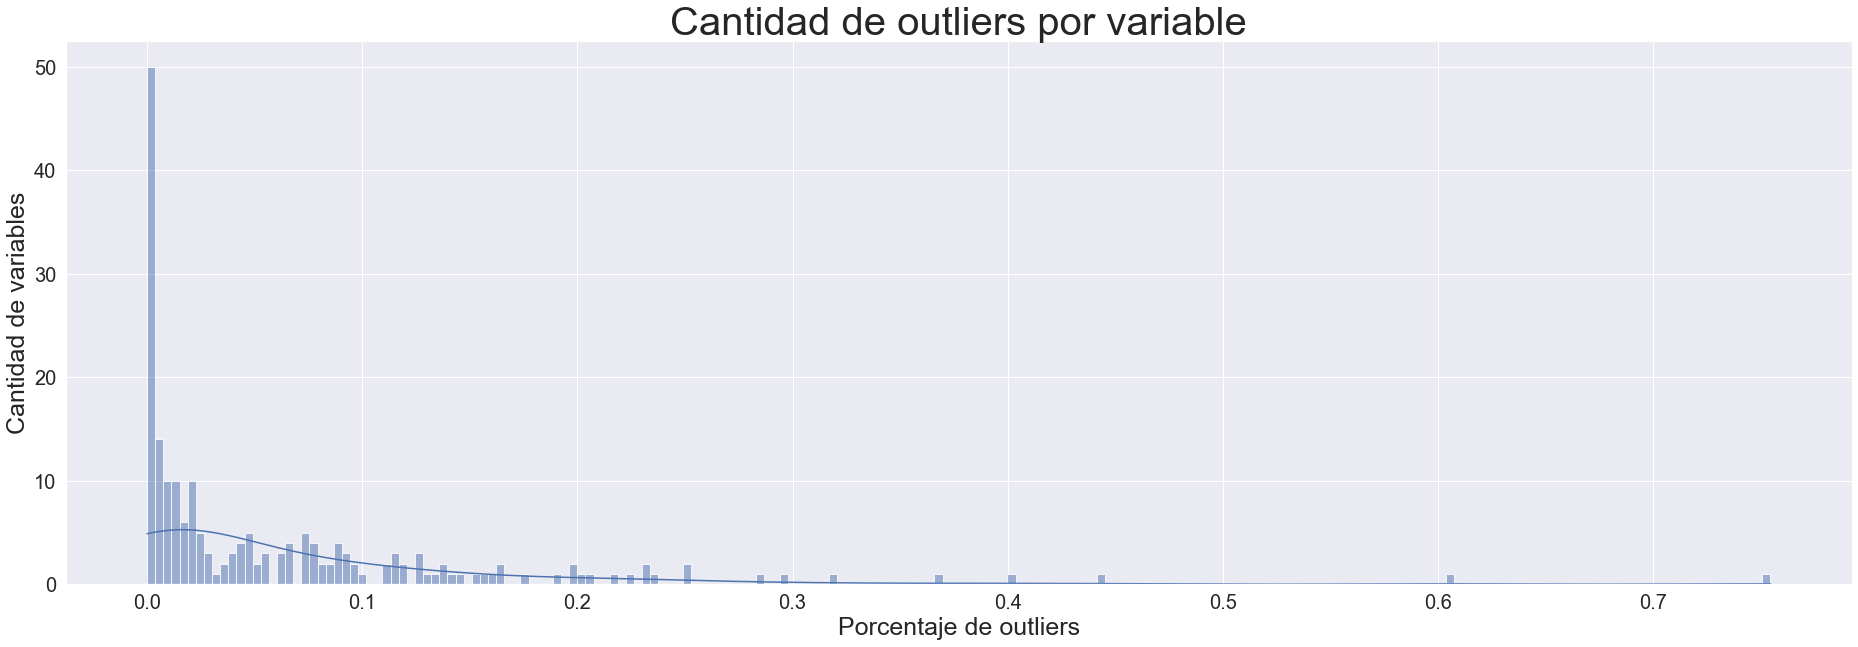

In [13]:
# Cálculamos del porcentaje de outliers por variable
per_out=[]  #lista vacia para gurdar porcetajes
for i in outliers: #Recorremos la lista de outliers
    per= i/200000*100 #Obtenemos el porcentaje 
    per_out.append(per) #Agregamos porcentaje a la lista

#Graficamos histograma con el porcentaje de outliers
plt.figure(figsize=(32,10))
sns.set(font_scale = 1)
sns.histplot(per_out, bins=200, kde=True)
plt.xlabel('Porcentaje de outliers', fontsize=25)
plt.ylabel('Cantidad de variables con %', fontsize=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20) 
plt.title("Cantidad de outliers por variable", fontsize=40)
plt.show()

Con este histograma podemos ver que hay más de 40 variables, de las 200 total que tiene un 0% de outliers; además, las variables que tienen mayor porcentaje de outliers son muy pocas.

In [16]:
#En la fórmula utilizada para obtener la cantidad de outliers por variable, con el contador columna podemos encontrar cual es la variable con más outliers. 
#Es decir, que var_179 es la variable con la mayor cantidad de outliers de todo el dataset

print(column)

179


In [52]:
#Límite superior de 'var_179'

H_BOUND['var_179']

10.03944992274046

In [53]:
#Límite inferior de 'var_179'

L_BOUND['var_179']

-5.0227499678730965

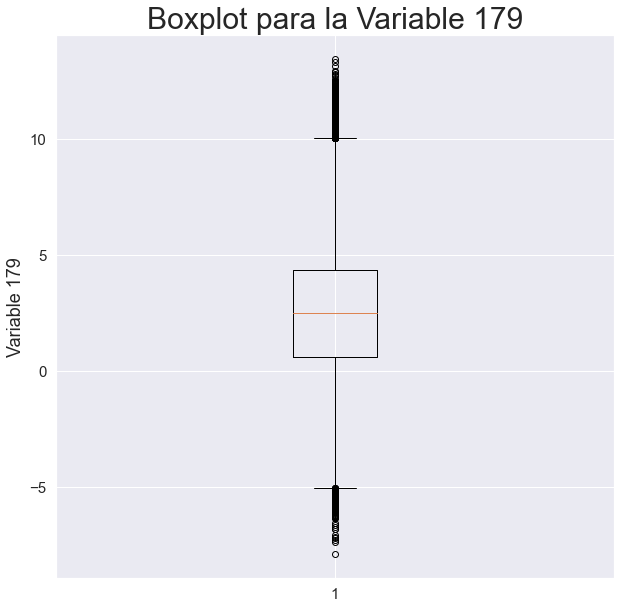

In [54]:
plt.figure(figsize=(10,10))
plt.boxplot(df["var_179"])
plt.ylabel('Variable 179', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Boxplot para la Variable 179", fontsize=30)

plt.show()

#Limite superior cercano a 10
#Limite inferior cercano a -5

In [25]:
#Iteramos para hacer la sumatoria de outliers totales

sumatoria=0
for i in outliers: 
    sumatoria+=i
    
print("La cantidad maxima de outliers es ", sumatoria)
    

La cantidad maxima de outliers es  26536


<br>

Ante el anonimato de las variables y la inexistencia de correlación entre ellas, nos es imposible realizar un análisis bivariado siguiendo un criterio. A pesar de esta situación, elegimos realizar un estudio multivariado para comparar de manera visual algunas variables.

<br>
<br>

<font size='4' style="color:forestgreen"><b> Análisis multivariado </b> </font>

<a name="Multivariado"></a>


In [27]:
#Dado el gran tamaño del dataset, creamos un subset para construir un pairplot y comparar las variables entre sí.

df_0a10= df.iloc[:, 1:12]
df_0a10

var_0   var_1    var_2   var_3    var_4    var_5   var_6  \
ID_code                                                                    
train_0        8.9255 -6.7863  11.9081  5.0930  11.4607  -9.2834  5.1187   
train_1       11.5006 -4.1473  13.8588  5.3890  12.3622   7.0433  5.6208   
train_2        8.6093 -2.7457  12.0805  7.8928  10.5825  -9.0837  6.9427   
train_3       11.0604 -2.1518   8.9522  7.1957  12.5846  -1.8361  5.8428   
train_4        9.8369 -1.4834  12.8746  6.6375  12.2772   2.4486  5.9405   
...               ...     ...      ...     ...      ...      ...     ...   
train_199995  11.4880 -0.4956   8.2622  3.5142  10.3404  11.6081  5.6709   
train_199996   4.9149 -2.4484  16.7052  6.6345   8.3096 -10.5628  5.8802   
train_199997  11.2232 -5.0518  10.5127  5.6456   9.3410  -5.4086  4.5555   
train_199998   9.7148 -8.6098  13.6104  5.7930  12.5173   0.5339  6.0479   
train_199999  10.8762 -5.7105  12.1183  8.0328  11.5577   0.3488  5.2839   

                var_7   var_8   var_9  var_10  
ID_code                                        
train_0       18.6266 -4.9200  5.7470  2.9252  
train_1       16.5338  3.1468  8.0851 -0.4032  
train_2       14.6155 -4.9193  5.9525 -0.3249  
train_3       14.9250 -5.8609  8.2450  2.3061  
train_4       19.2514  6.2654  7.6784 -9.4458  
...               ...     ...     ...     ...  
train_199995  15.1516 -0.6209  5.6669  3.7574  
train_199996  21.5940 -3.6797  6.0019  6.5576  
train_199997  21.5571  0.1202  6.1629  4.4004  
train_199998  17.0152 -2.1926  8.7542  1.4245  
train_199999  15.2058 -0.4541  9.3688 -7.3826  

[200000 rows x 11 columns]

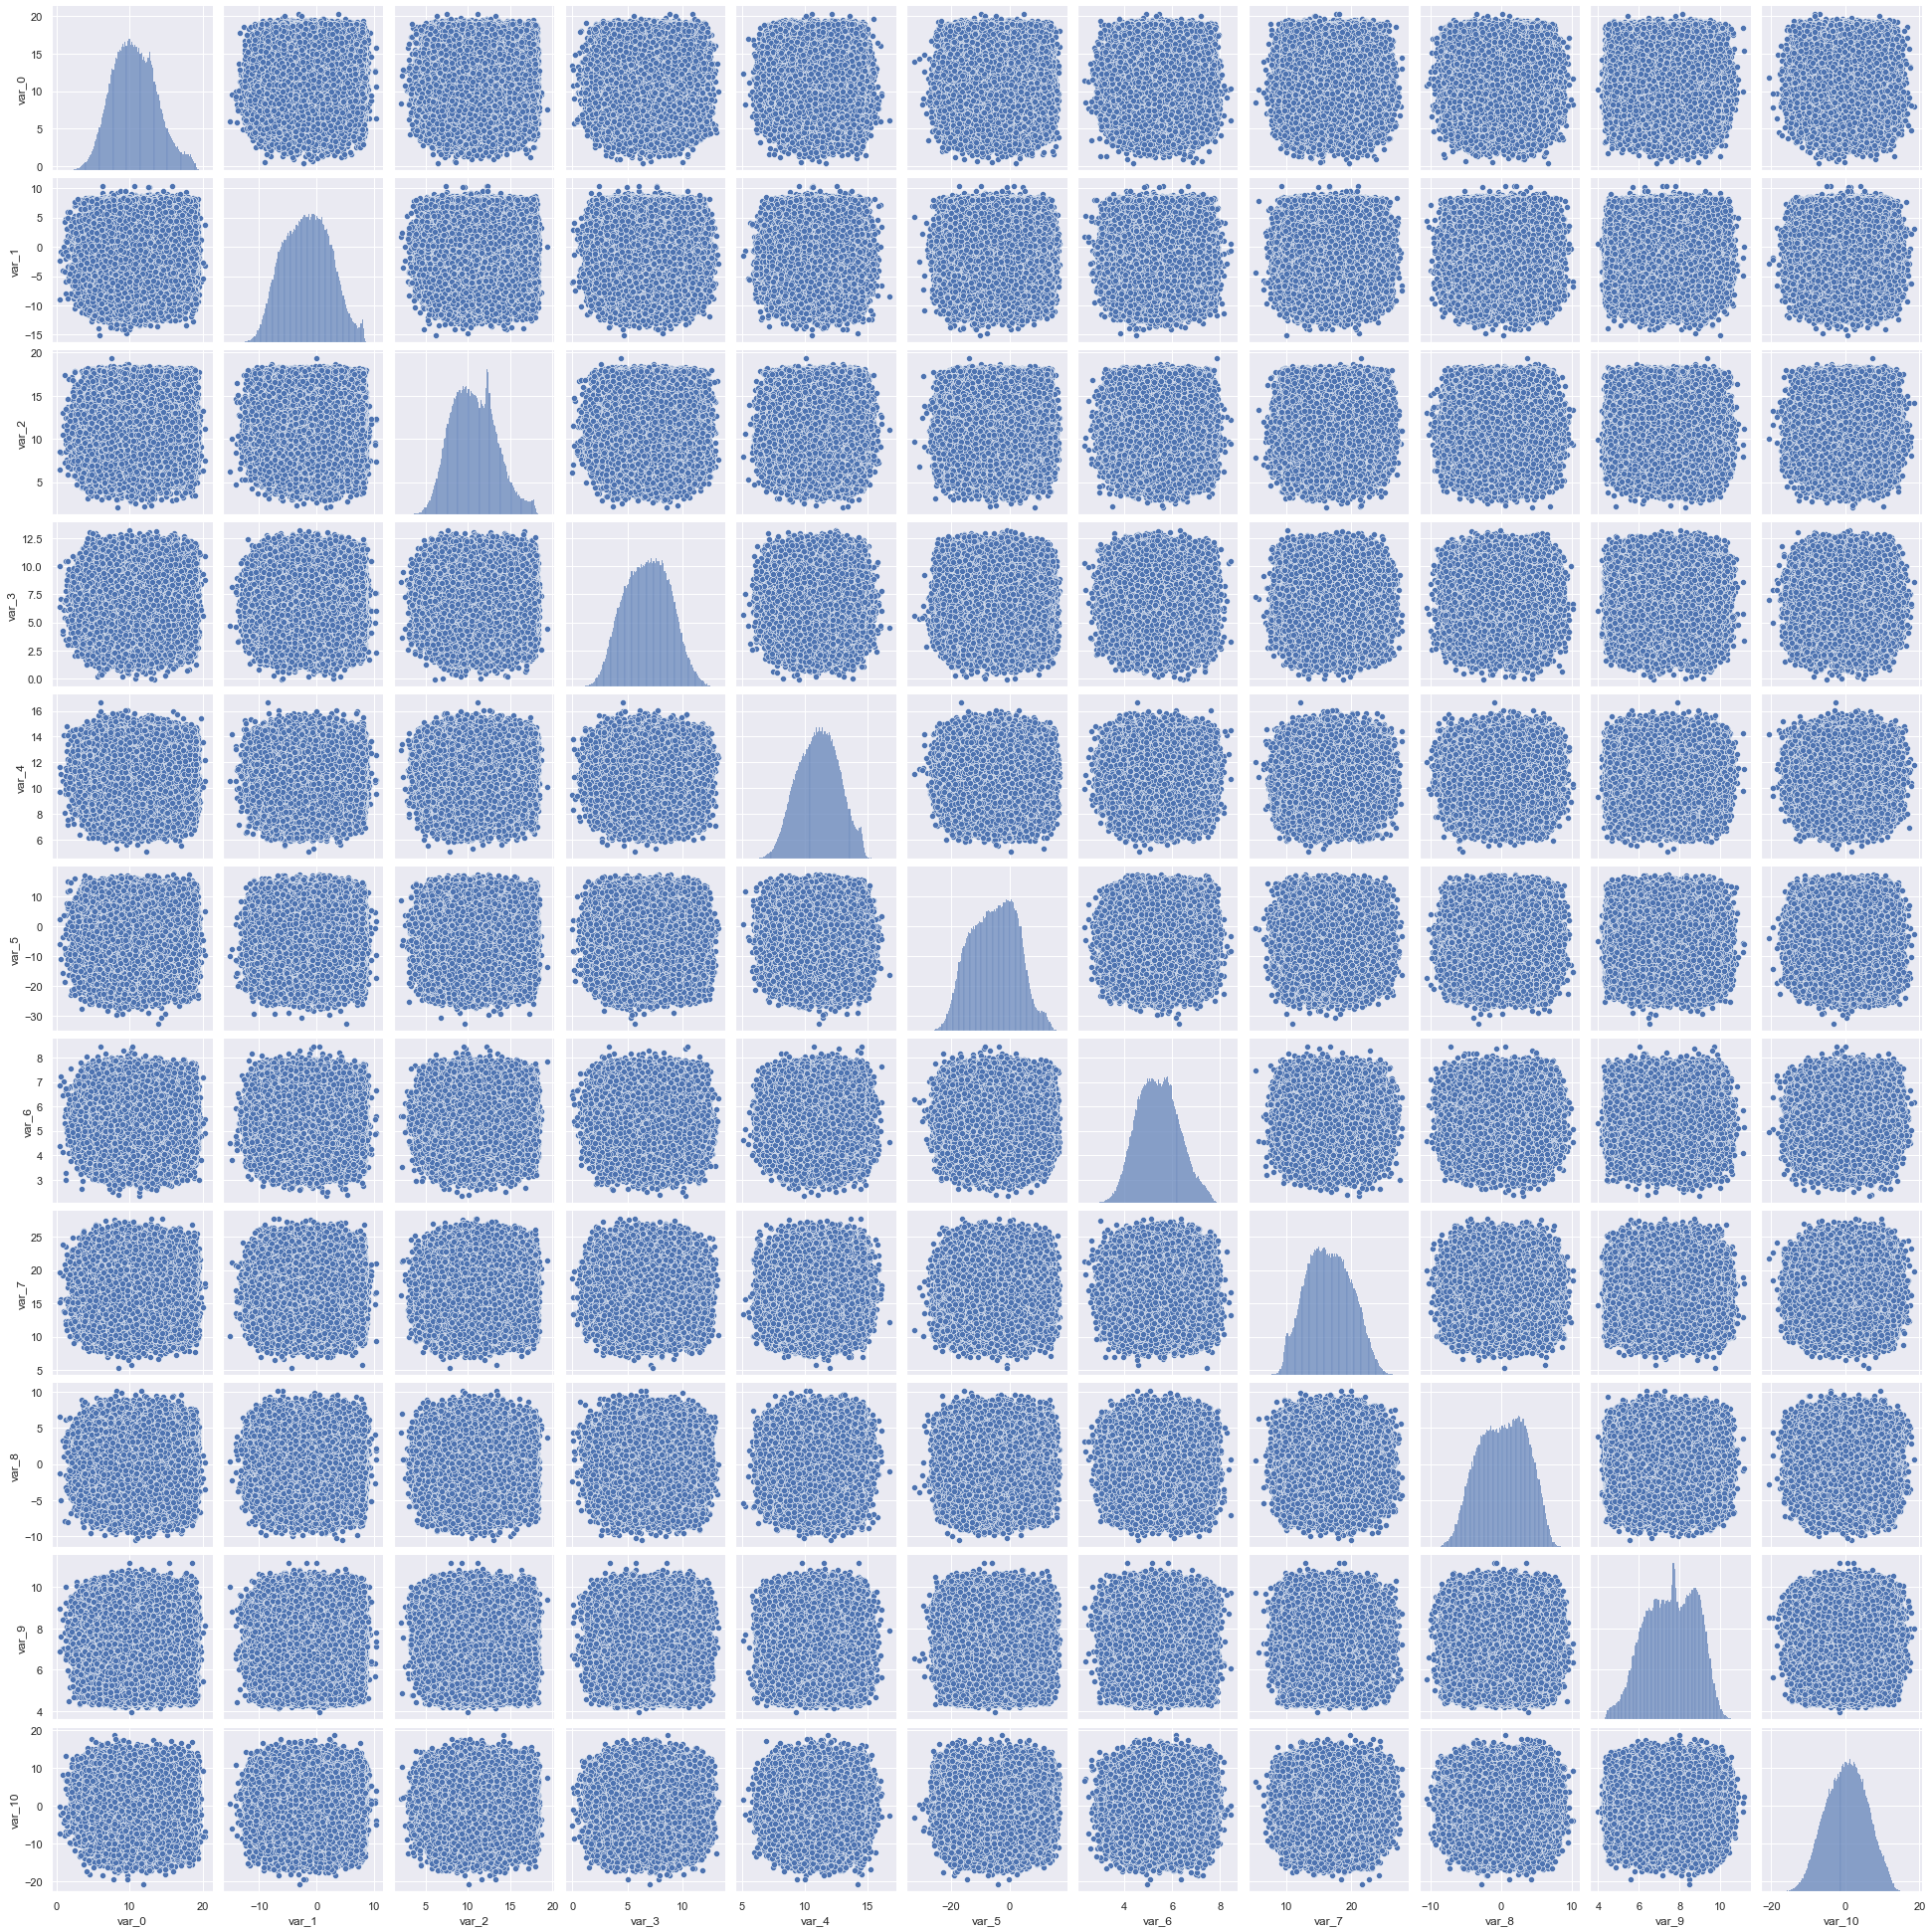

In [33]:
# Graficamos la relación entre las variables seleccionadas

sns.pairplot(df_0a10)
plt.show()

#====================================================
# Podemos observar que en los gráficos scatter no existe correlación entre las variables 

<br>
<br>

A pesar el resultado del pairplot, elegimos dos variables dentro de las graficadas y buscamos ver como se distribuyen los valores de target comparandolas entre si.

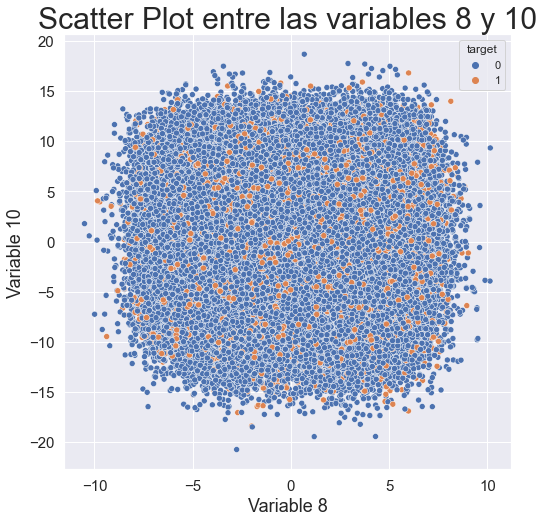

In [30]:
plt.figure(figsize=(8,8))
sns.scatterplot( data =df, x="var_8",y= "var_10", hue="target") 
plt.xlabel('Variable 8', fontsize=18)
plt.ylabel('Variable 10', fontsize=18)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Scatter Plot entre las variables 8 y 10", fontsize=30)
plt.show()

Podemos decir que no se observan outliers bidimensionales y la cantidad de outliers de una sola dimensión es pequeña.
No hay correlación entre las variables ni tampoco una distribución particular para los valores 1 de target.

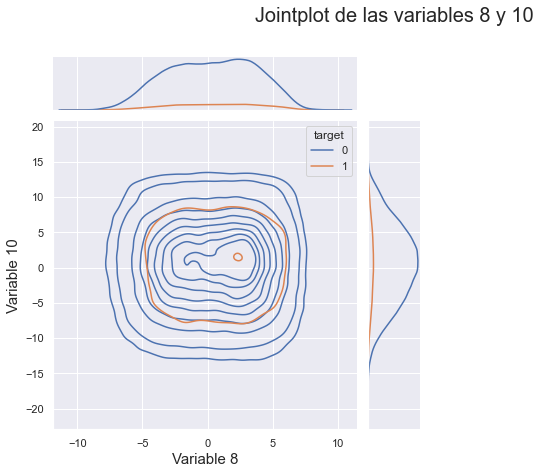

In [24]:
sns.set(rc={"figure.figsize":(16, 6)}) 
p =sns.jointplot(data=df, x='var_8', y='var_10', hue= 'target', kind= 'kde')
p.set_axis_labels('Variable 8', 'Variable 10', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title("Jointplot de las variables 8 y 10", y=1.3, fontsize=20)
plt.show()



Utilizar un jointplot en lugar de un scatter plot para las mismas variables nos permite ver que el volumen de valores 1 para target tiene un punto de concentración mucho más pequeño que para el valor 0 y que su distribución es menor. Es decir, que el volumen de datos que sí realizan la operación es radicalmente menor que quienes no realizan la operación. 
Quienes no realizan la operación tienen también una mayor concentración hacia el centro del gráfico pero con un área central más de 10 veces más grande que para el valor 1. 

<br>

<font size='6' style="color:forestgreen"><b> Conclusión </b> </font>

<a name="Conclusion"></a>

[[ Back to Top ]](#content)

- El dataset se encuentra pre-procesado. No posee valores nulos, todas las variables son independientes y con distribuciones de datos similares a una ditribución normal.
- No es posible descartar ninguna de los variables de forma objetiva puesto que no se tiene referencia de a que dato corresponde cada una de ellas. 
- Reduciendo el uso de memoria creamos un set de datos más liviano que hará más rápido el trabajo de los modelos a emplear, reduciendo así, los costos computacionales. 
- La presencia de outliers no es significativa con lo cual, trabajaremos con el set de datos tal cual como está (luego de la reducción de dimensionalidad de variables).
    
    


<br>
<br>
<br>
<br>
<br>
<br>
<br>

<font size='6' style="color:forestgreen"><b> Pasos a seguir </b> </font>

<a name="Pasos"></a>

[[ Back to Top ]](#content)

- Buscaremos estudiar varios modelos de Machine Learning para obtener predicciones del dataset.

- Realizaremos un análisis de reducción de variables PCA para luego validarlo con los distintos métodos propuestos y medir sus niveles de acierto/error en sus predicciones mediante Precision y Recall.

- Una vez realizados estos trabajos, buscaremos optimizar estos modelos mediante la optimización Bayesiana utilizando Optuna.